<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

# Independent Practice

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Import the Airline Passengers data set, preprocess the data, and plot the raw time series.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *
%matplotlib inline

In [2]:
airline = pd.read_csv('../data/airline.csv')
airline.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
airline.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [4]:
airline.drop(airline.index[144], inplace=True)

In [5]:
airline.columns= ['index','passengers']

In [6]:
start = datetime.datetime.strptime("1960-09-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0, airline.shape[0])]
airline['index'] = date_list
airline.set_index(['index'], inplace=True)
airline.index.name=None

airline.head() 

,passengers
1960-09-01,112.0
1960-10-01,118.0
1960-11-01,132.0
1960-12-01,129.0
1961-01-01,121.0


In [7]:
airline['passengers'] = airline.passengers.apply(lambda x: int(x))

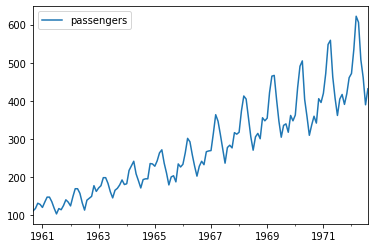

In [8]:
airline.plot()

### 2) Decompose the time series and plot using the `.seasonal_decompose()` function.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decomposition = seasonal_decompose(airline, freq = 12)

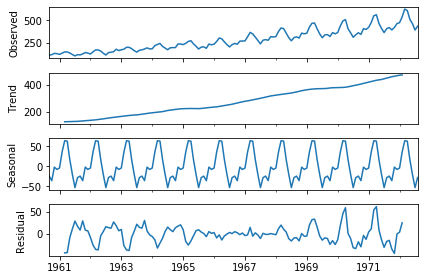

In [11]:
decomposition.plot()
plt.show()

### 3) Interpret these plots.

In [21]:
# There is a clear upward trend in airline passengers. There is a strong seasonal component. 